In [1]:
import numpy as np 
import sys,os
import cv2
import matplotlib.pyplot as plt
import argparse
import pandas as pd
from utils import *
import random


In [2]:
root_dir = "/home/sebasmos/Documentos/NASA_Spacesuit/train/"
# Load data paths
training_images = []   # images png + jpg
img_ann = []        # images annotations
    
videos = []         # videos
videos_ann = []     # videos annotations
video_frames = []   # video frames
video_frames_ann=[] # video frames annotations

for root, dirs, files in os.walk(root_dir, topdown=True):
    for name in files:
        path = os.path.join(root, name)            
        if '.png' in path  and 'images' in path:
            training_images.append(path)
            print(path)
        if '.jpg' in path  and 'images' in path:
            training_images.append(path)
        if '.txt' in path and 'images' in path:
            img_ann.append(path)
        if '.mov' in path and 'videos' in path:
            videos.append(path)
        if '.csv' in path and 'videos' in path:
            videos_ann.append(path)
        if '.jpg' in path and 'videos-frames' in path:
            video_frames.append(path)
            #if '.csv' in path and 'videos-frames' in path: #TODO: CHECK ANNOTATIONS
            #    video_frames_ann.append(path)
print('Image training instances: ', len(training_images))
print('videos training instances: ', len(videos))
print('video_frames evaluation instances: ', len(video_frames))


/home/sebasmos/Documentos/NASA_Spacesuit/train/images/969689.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/409779.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/969698.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/526920.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/049349.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/950880.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/336825.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/591443.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/988860.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/198464.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/530935.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/759158.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/140435.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/394854.png
/home/sebasmos/Documentos/NASA_Spacesuit/train/images/775588.png
/home/sebasmos/Documentos

## Simple segmentation -  Model 1 

In [3]:
def segmentation(path, label):
    image = cv2.imread(path)
    mask = np.zeros(image.shape[:2], np.uint8)
    backgroundModel = np.zeros((1, 65), np.float64)
    foregroundModel = np.zeros((1, 65), np.float64)
    rectangle = (0, 0, 500, image.shape[1])
    cv2.grabCut(image, mask, rectangle,  
                backgroundModel, foregroundModel,
                3, cv2.GC_INIT_WITH_RECT)
    mask2 = np.where((mask == 2)|(mask == 0), 0, 1).astype('uint8')
   
    # The final mask is multiplied with 
    # the input image to give the segmented image.
    image = image * mask2[:, :, np.newaxis]
      
    # output segmented image with colorbar
    '''
    plt.imshow(image)
    plt.colorbar()
    plt.show()
    
    cv2.imwrite('/home/sebasmos/Documentos/NASA_Spacesuit/NASA_SpatiumAESS/Training_code/code/image.jpg',image)
    '''
    return image
# Fast testing bef assignmt
path = "/home/sebasmos/Documentos/NASA_Spacesuit/train/images/933760.jpg"
#segmentation(path, 1)

    1/86...


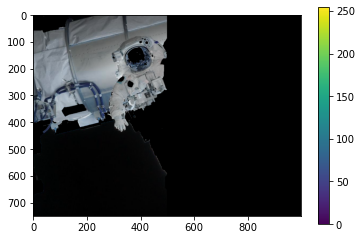

    2/86...


KeyboardInterrupt: 

In [6]:
i = 0
# Training with images 
Num_features = 1
feat_names = ['Polygon'] # TODO: EXTRACT TRIPLETS HERE!
train_size = len(training_images)

data_train = np.zeros((train_size, Num_features+1), dtype=np.float32)
#data_test = np.zeros((test_size, Num_features+1), dtype=np.float32)
for path in training_images:
    print('    {}/{}...'.format(i+1, len(training_images)))
    data_train[i, :] = feature_extraction(path, 2)
    i = i+1

# Store segmented images 
# TODO: convert to mask
train_pd = pd.DataFrame(training_images)
train_pd.to_csv("/home/sebasmos/Documentos/NASA_Spacesuit/NASA_SpatiumAESS/Training_code/code/src/sample/submission/training_images.csv")

In [11]:
train_pd = pd.read_csv("/home/sebasmos/Documentos/NASA_Spacesuit/NASA_SpatiumAESS/Training_code/code/src/sample/submission/training_images.csv")
train_size = len(training_images)
print("training data: ", train_size)

training data:  86


In [12]:
local_dir = "/home/sebasmos/Documentos/NASA_Spacesuit/NASA_SpatiumAESS/Training_code/code/src/sample/submission/training_images.csv"

## Triplets extraction with synthetic data: testing idea

<image-id>,<joint-coordinate-list>,[<spacesuit-shape>]...

In [34]:
Num_suits = 1 # TO UPDATE ACCORDING TO IMAGE
Triplets = 15 #
aux = Num_suits*Triplets
#joints = np.zeros((train_size, Num_suits*Triplets))

#train ? 
id_images = []
aux = len(path) - 10
for path in training_images:
    id_images.append(path[aux:len(path)])


def gen_array():
    x_f = []
    y_f = []
    v_f = []

    for i in range(15):
        x_f.append(int (random.uniform(100,999)))
        y_f.append(int (random.uniform(100,999)))
        v_f.append(int (random.uniform(0,3)))

    return x_f,y_f,v_f


def gen_geometries():
    x_f = []
    y_f = []
    type = 0
    if type == 0: #rectangular then 8 var, 4 corners
        for i in range(4):
            x_f.append(int (random.uniform(100,999)))
            y_f.append(int (random.uniform(100,999)))
    elif type==1: # 3 corners
        print("triangular")
    else:
        print("no figure detected")
    return x_f,y_f
    

joints_id = []
geom = []

for id, j in enumerate(training_images):

    for i in range(Num_suits):
            #print(" es multiplo de 3")
            x_f,y_f,v_f = gen_array()
            joints_id.append(x_f + y_f + v_f)
            x_geom, y_geom = gen_geometries()
            geom.append(x_geom + y_geom)
            
print("id_images: ",train_size)
print("joints_id: ",len(joints_id))
print("geom: ",len(geom))


Stored in ../../../solution_sintetica.csv
id_images:  86
joints_id:  86
geom:  86


### Store to csv - Change by real data

In [36]:

df1 = pd.DataFrame(id_images) 
df2 = pd.DataFrame(joints_id)
df3 = pd.DataFrame(geom)

df4 = df1.merge(df2,left_index=True, right_index=True)
df4.merge(df3,left_index=True, right_index=True)

df4.to_csv("../../../../solution/training_images.csv")

# Using lists for diff length rows 

In [248]:
a_list = [[1, 2], [1], [1, 2,3,5,4,3,2,2,3, 3]]
row_lengths = []
for row in a_list:
    row_lengths.append(row) 
row_lengths




[[1, 2], [1], [1, 2, 3, 5, 4, 3, 2, 2, 3, 3]]

## Store to solutions.csv 

In [ ]:
# 